In [3]:
import tensorflow as tf

In [4]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [5]:
print(sess)

In [6]:
import tensorflow as tf
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)
with tf.Session() as sess:
    print (sess.run(c))

[[22. 28.]
 [49. 64.]]


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color
from skimage import exposure
from time import time

from keras import backend
from keras.models import Sequential
from keras import layers
from keras import metrics
from keras import models
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras import optimizers, losses, metrics
from keras import backend as K
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [8]:
#MNIST
from keras.datasets import mnist
from keras.utils import np_utils

#load X_train, y_train, X_test, y_test and plot 4 images using plt.imshow()

(x_train, y_train), (x_test, y_test) = mnist.load_data()

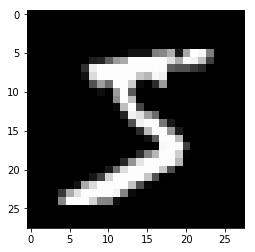

In [9]:
# Normalize X_train, X_test
img_rows, img_cols = x_train.shape[1:]
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

In [10]:
x_train_ = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test_ = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train_ = x_train_.astype('float32')
x_test_ = x_test_.astype('float32')
x_train_ /= 255.
x_test_ /= 255.
nb_classes = 10
y_train_ = np_utils.to_categorical(y_train, nb_classes)
y_test_ = np_utils.to_categorical(y_test, nb_classes)

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
backend.clear_session()

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(nb_classes), activation='softmax')
model.summary()


TypeError: add() got an unexpected keyword argument 'activation'

In [14]:
model.compile(optimizer=optimizers.sgd(), loss='categorical_crossentropy',
             metrics=[metrics.categorical_accuracy])
tensorboard = TensorBoard(log_dir='logs/', histogram_freq=1)

In [ ]:
model.fit(x_train_, y_train_, epochs=5, verbose=1, callbacks=[tensorboard], validation_data=(x_test_, y_test_))

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(nb_classes))
model.summary()

## Con el API Funcional

In [17]:
def build_conv2d_maxpool(x0, filters, kernel_size, activation, pool_size):
    x1 = layers.Conv2D(filters=filters, kernel_size=kernel_size, activation=activation, padding='same')(x0)
    x2 = layers.MaxPooling2D(pool_size=pool_size)(x1)
    x3 = layers.Conv2D(filters=filters, kernel_size=kernel_size, activation=activation, padding='same')(x2)
    x4 = layers.MaxPooling2D(pool_size=pool_size)(x3)
    x5 = layers.Conv2D(filters=filters, kernel_size=kernel_size, activation=activation,  padding='same')(x4)
    x6 = layers.MaxPooling2D(pool_size=pool_size)(x5)
    return x6

In [18]:
backend.clear_session()

x0 = layers.Input(shape=input_shape, dtype='float32')
x61 = build_conv2d_maxpool(x0, filters=16, kernel_size=(7,7), activation='relu', pool_size=(2,2))
x62 = build_conv2d_maxpool(x0, 16, (5,5), 'relu', (2,2))
x63 = build_conv2d_maxpool(x0, 16, (3,3), 'relu', (2,2))
x7 = layers.concatenate([x61, x62, x63])
x8 = layers.Flatten()(x7)
x9 = layers.Dense(32, activation='elu')(x8)
x10 = layers.Dense(10, activation='softmax')(x9)

model_funcional = Model(inputs=x0, outputs=x10)

model_funcional.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 16)   800         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 28, 28, 16)   416         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 28, 28, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
max_poolin

In [19]:
model_funcional.compile(optimizer=optimizers.sgd(), loss='categorical_crossentropy',
             metrics=[metrics.categorical_accuracy])
tensorboard = TensorBoard(log_dir='logs1/', histogram_freq=1)

In [20]:
model_funcional.fit(x_train_, y_train_, epochs=5, verbose=1, callbacks=[tensorboard], validation_data=(x_test_, y_test_))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 23s 379us/step - loss: 0.5006 - categorical_accuracy: 0.8514 - val_loss: 0.1765 - val_categorical_accuracy: 0.9455
Epoch 2/5
60000/60000 [==============================] - 21s 357us/step - loss: 0.1189 - categorical_accuracy: 0.9638 - val_loss: 0.0805 - val_categorical_accuracy: 0.9741
Epoch 3/5
60000/60000 [==============================] - 23s 378us/step - loss: 0.0860 - categorical_accuracy: 0.9736 - val_loss: 0.0857 - val_categorical_accuracy: 0.9740
Epoch 4/5
60000/60000 [==============================] - 23s 378us/step - loss: 0.0688 - categorical_accuracy: 0.9783 - val_loss: 0.0609 - val_categorical_accuracy: 0.9810
Epoch 5/5
60000/60000 [==============================] - 23s 383us/step - loss: 0.0583 - categorical_accuracy: 0.9815 - val_loss: 0.0594 - val_categorical_accuracy: 0.9799


# CNN Autoencoder

In [59]:
backend.clear_session()

In [67]:
input_img = Input(shape=(28,28,1))
x = Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(input_img)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu')(x)
encoded = MaxPooling2D(pool_size=(2,2), padding='same')(x)

x = Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu')(encoded)
x = UpSampling2D(size=(2,2))(x)
x = Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(x)
x = UpSampling2D(size=(2,2))(x)
decoded=Conv2D(filters=1, kernel_size=(3,3), activation='relu', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 14, 14, 8)         0         
__________

In [68]:
autoencoder.compile(optimizer='adadelta', loss=losses.binary_crossentropy, metric=metrics.binary_accuracy)
tensorboard = TensorBoard(log_dir='tmp/autoencoder', histogram_freq=1)

In [69]:
autoencoder.fit(x_train_, x_train_, batch_size=256, epochs=5, verbose=1, validation_data=(x_test_, x_test_),
                callbacks=[tensorboard])

ValueError: ('Some keys in session_kwargs are not supported at this time: %s', dict_keys(['metric']))

C:\Users\DSS\Anaconda3\envs\dl_win_gpu\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


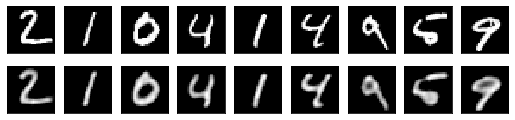

In [54]:
decoded_imgs = autoencoder.predict(x_test_)

import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(10, 2))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
        # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Text

In [71]:
import pandas as pd

In [72]:
filepath_dict = {'yelp': '../data/sentiment labelled sentences/yelp_labelled.txt',
                'amazon': '../data/sentiment labelled sentences/amazon_cells_labelled.txt',
                'imdb': '../data/sentiment labelled sentences/imdb_labelled.txt'}

In [73]:
df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
df.head()

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


In [ ]:
from sklearn.feature_extraction.

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_word=5000)
tokenizer.fit_on_texts(sentences_train)